In [3]:
import pandas as pd

# Load the data from the provided CSV file
file_path = 'tv_shows.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
data.head(), data.columns


(   Unnamed: 0  ID             Title  Year  Age    IMDb Rotten Tomatoes  \
 0           0   1      Breaking Bad  2008  18+  9.4/10         100/100   
 1           1   2   Stranger Things  2016  16+  8.7/10          96/100   
 2           2   3   Attack on Titan  2013  18+  9.0/10          95/100   
 3           3   4  Better Call Saul  2015  18+  8.8/10          94/100   
 4           4   5              Dark  2017  16+  8.8/10          93/100   
 
    Netflix  Hulu  Prime Video  Disney+  Type  
 0        1     0            0        0     1  
 1        1     0            0        0     1  
 2        1     1            0        0     1  
 3        1     0            0        0     1  
 4        1     0            0        0     1  ,
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
        'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
       dtype='object'))

In [4]:
# Clean and prepare the data for analysis

# Remove unnecessary columns like 'Unnamed: 0' and convert ratings (IMDb, Rotten Tomatoes) to numerical values
data_cleaned = data.drop(columns=['Unnamed: 0', 'ID'])

# Convert IMDb ratings from strings (e.g., "9.4/10") to float values
data_cleaned['IMDb'] = data_cleaned['IMDb'].str.replace('/10', '').astype(float)

# Convert Rotten Tomatoes ratings from strings (e.g., "100/100") to float values
data_cleaned['Rotten Tomatoes'] = data_cleaned['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# Display the cleaned dataset structure
data_cleaned.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,2008,18+,9.4,100.0,1,0,0,0,1
1,Stranger Things,2016,16+,8.7,96.0,1,0,0,0,1
2,Attack on Titan,2013,18+,9.0,95.0,1,1,0,0,1
3,Better Call Saul,2015,18+,8.8,94.0,1,0,0,0,1
4,Dark,2017,16+,8.8,93.0,1,0,0,0,1


In [6]:
# Count of shows available on each platform
platform_counts = {
    'Netflix': data_cleaned['Netflix'].sum(),
    'Hulu': data_cleaned['Hulu'].sum(),
    'Prime Video': data_cleaned['Prime Video'].sum(),
    'Disney+': data_cleaned['Disney+'].sum()
}

# Average IMDb and Rotten Tomatoes ratings per platform
platform_ratings = {
    'Netflix': {
        'Average IMDb': data_cleaned.loc[data_cleaned['Netflix'] == 1, 'IMDb'].mean(),
        'Average Rotten Tomatoes': data_cleaned.loc[data_cleaned['Netflix'] == 1, 'Rotten Tomatoes'].mean()
    },
    'Hulu': {
        'Average IMDb': data_cleaned.loc[data_cleaned['Hulu'] == 1, 'IMDb'].mean(),
        'Average Rotten Tomatoes': data_cleaned.loc[data_cleaned['Hulu'] == 1, 'Rotten Tomatoes'].mean()
    },
    'Prime Video': {
        'Average IMDb': data_cleaned.loc[data_cleaned['Prime Video'] == 1, 'IMDb'].mean(),
        'Average Rotten Tomatoes': data_cleaned.loc[data_cleaned['Prime Video'] == 1, 'Rotten Tomatoes'].mean()
    },
    'Disney+': {
        'Average IMDb': data_cleaned.loc[data_cleaned['Disney+'] == 1, 'IMDb'].mean(),
        'Average Rotten Tomatoes': data_cleaned.loc[data_cleaned['Disney+'] == 1, 'Rotten Tomatoes'].mean()
    }
}

platform_counts, platform_ratings


({'Netflix': np.int64(1971),
  'Hulu': np.int64(1621),
  'Prime Video': np.int64(1831),
  'Disney+': np.int64(351)},
 {'Netflix': {'Average IMDb': np.float64(7.1109333333333336),
   'Average Rotten Tomatoes': np.float64(53.55910705225774)},
  'Hulu': {'Average IMDb': np.float64(7.082369534555712),
   'Average Rotten Tomatoes': np.float64(52.83775447254781)},
  'Prime Video': {'Average IMDb': np.float64(7.152538071065989),
   'Average Rotten Tomatoes': np.float64(37.76133260513381)},
  'Disney+': {'Average IMDb': np.float64(6.97111111111111),
   'Average Rotten Tomatoes': np.float64(49.42450142450142)}})

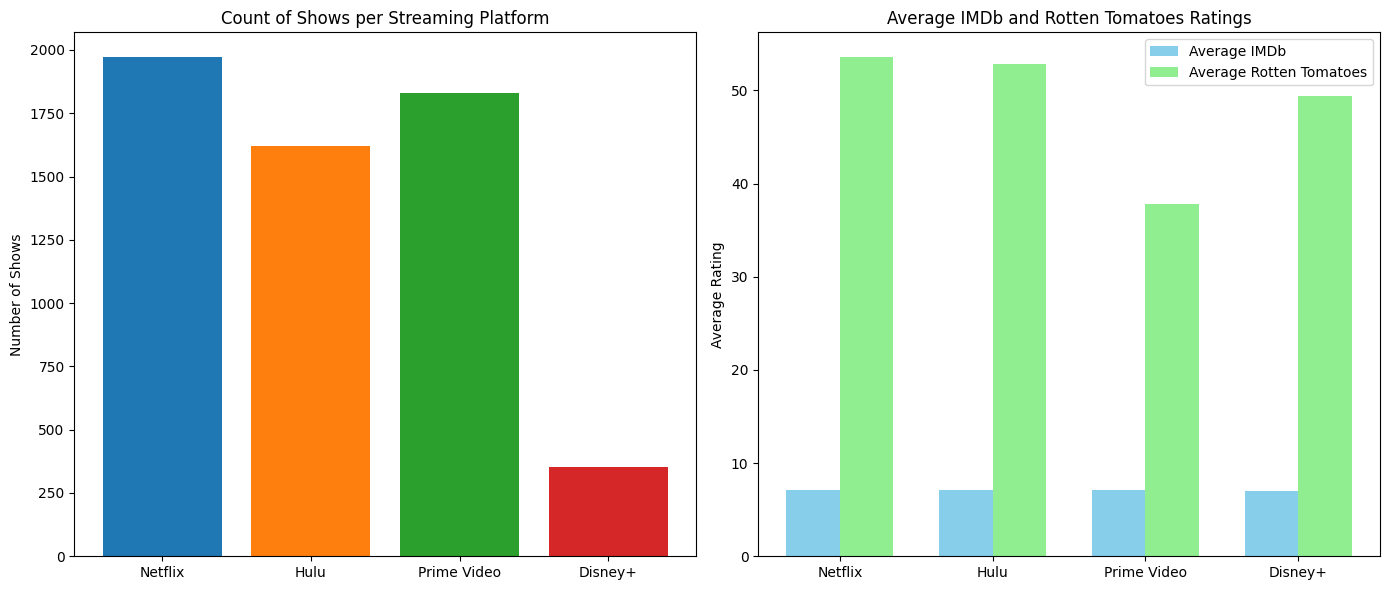

In [7]:
import matplotlib.pyplot as plt

# Data for visualization
platforms = list(platform_counts.keys())
show_counts = list(platform_counts.values())
imdb_ratings = [platform_ratings[platform]['Average IMDb'] for platform in platforms]
rt_ratings = [platform_ratings[platform]['Average Rotten Tomatoes'] for platform in platforms]

# Create a figure with subplots for both show count and ratings
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count of shows on each platform
axes[0].bar(platforms, show_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0].set_title('Count of Shows per Streaming Platform')
axes[0].set_ylabel('Number of Shows')

# Plot 2: Average ratings on each platform
width = 0.35
ind = range(len(platforms))

axes[1].bar(ind, imdb_ratings, width, label='Average IMDb', color='skyblue')
axes[1].bar([i + width for i in ind], rt_ratings, width, label='Average Rotten Tomatoes', color='lightgreen')

axes[1].set_title('Average IMDb and Rotten Tomatoes Ratings')
axes[1].set_ylabel('Average Rating')
axes[1].set_xticks([i + width / 2 for i in ind])
axes[1].set_xticklabels(platforms)

# Add legend
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


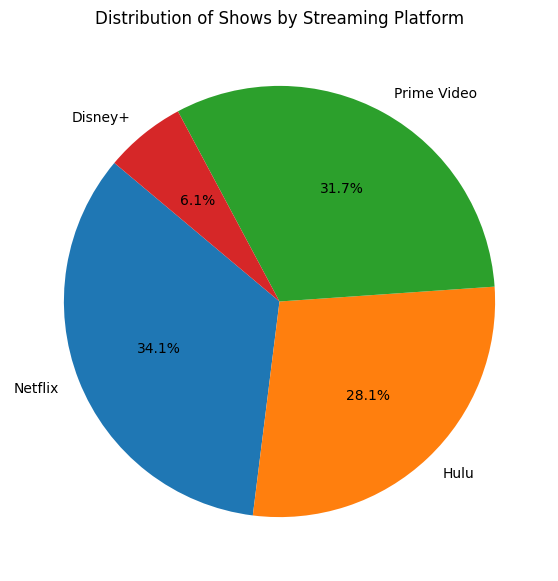

In [8]:
# Pie chart for show distribution by platform
plt.figure(figsize=(7, 7))
plt.pie(show_counts, labels=platforms, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribution of Shows by Streaming Platform')
plt.show()


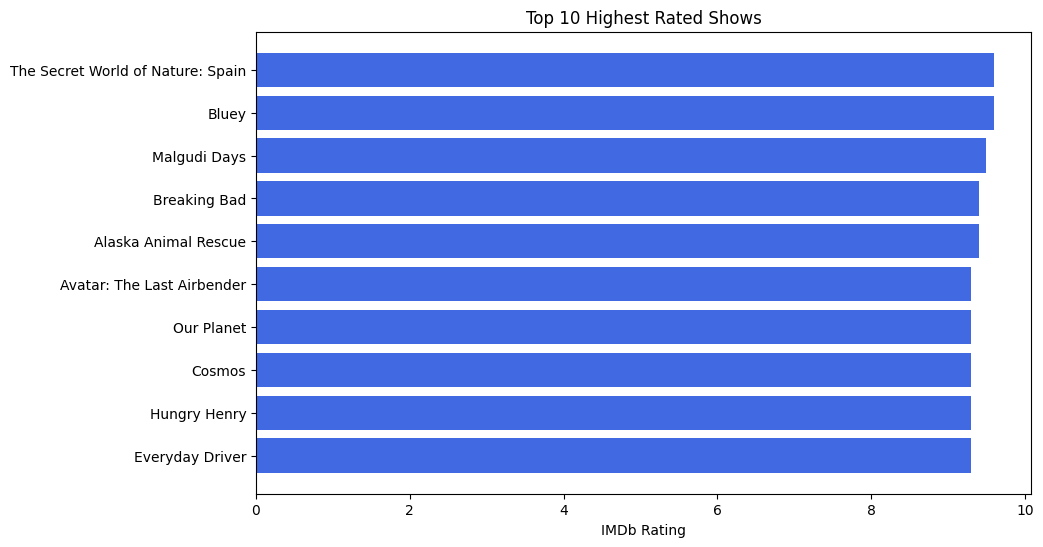

In [9]:
# Get the top 10 shows based on IMDb rating
top_10_shows = data_cleaned.nlargest(10, 'IMDb')

# Bar chart for top 10 shows and their platforms
plt.figure(figsize=(10, 6))
plt.barh(top_10_shows['Title'], top_10_shows['IMDb'], color='royalblue')
plt.xlabel('IMDb Rating')
plt.title('Top 10 Highest Rated Shows')
plt.gca().invert_yaxis()
plt.show()


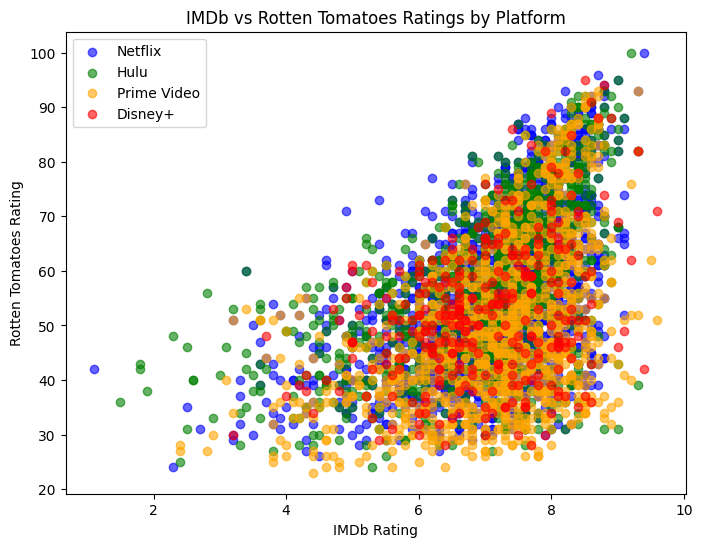

In [10]:
# Scatter plot for IMDb vs Rotten Tomatoes for each platform
colors = {'Netflix': 'blue', 'Hulu': 'green', 'Prime Video': 'orange', 'Disney+': 'red'}

plt.figure(figsize=(8, 6))

# Plot for each platform
for platform in platforms:
    plt.scatter(data_cleaned.loc[data_cleaned[platform] == 1, 'IMDb'], 
                data_cleaned.loc[data_cleaned[platform] == 1, 'Rotten Tomatoes'], 
                label=platform, alpha=0.6, color=colors[platform])

plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('IMDb vs Rotten Tomatoes Ratings by Platform')
plt.legend()
plt.show()


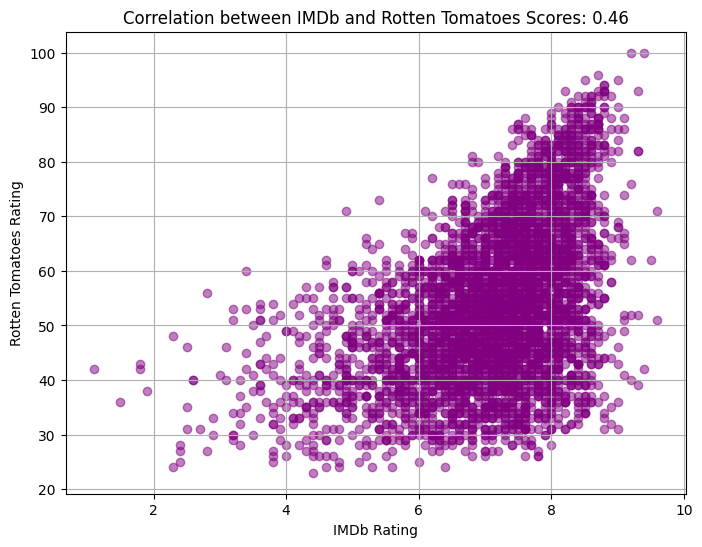

Correlation between IMDb and Rotten Tomatoes: 0.46


In [13]:
import matplotlib.pyplot as plt

# Calculate the correlation between IMDb and Rotten Tomatoes ratings
correlation = data_cleaned['IMDb'].corr(data_cleaned['Rotten Tomatoes'])

# Create a scatter plot to visualize the relationship between IMDb and Rotten Tomatoes scores
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['IMDb'], data_cleaned['Rotten Tomatoes'], alpha=0.5, color='purple')
plt.title(f'Correlation between IMDb and Rotten Tomatoes Scores: {correlation:.2f}')
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.grid(True)

# Display the plot
plt.show()

# Output the calculated correlation
print(f'Correlation between IMDb and Rotten Tomatoes: {correlation:.2f}')
